In [9]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Загружаем данные
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Преобразование размерности изображений
x_train = x_train.reshape(60000, 784)
# Нормализация данных
x_train = x_train / 255

In [3]:
# Преобразуем метки правильных ответов в категории
y_train = utils.to_categorical(y_train, 10)

# 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

# Названия классов
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']


In [4]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству категорий)
model.add(Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


<img src="f_activation.png" width="600">

In [6]:
# Обучаем сеть
history = model.fit(x_train, y_train, 
                    batch_size=200, history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,  
                    verbose=1)
                    epochs=100,  
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60000/60000 [==============================] - 6s 96us/sample - loss: 1.1177 - acc: 0.6712
Epoch 2/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.7215 - acc: 0.7732
Epoch 3/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.6324 - acc: 0.7999
Epoch 4/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5835 - acc: 0.8129
Epoch 5/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.5520 - acc: 0.8204
Epoch 6/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5291 - acc: 0.8250
Epoch 7/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.5120 - acc: 0.8307
Epoch 8/100
60000/60000 [==============================] - 9s 155us/sample - loss: 0.4978 - acc: 0.8344s - loss: 0.499
Epoch 9/100
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4865 - acc: 0.8380
Epoch 10

60000/60000 [==============================] - 7s 120us/sample - loss: 0.3279 - acc: 0.8854
Epoch 76/100
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3265 - acc: 0.8863
Epoch 77/100
60000/60000 [==============================] - 11s 181us/sample - loss: 0.3255 - acc: 0.8865
Epoch 78/100
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3244 - acc: 0.8873
Epoch 79/100
60000/60000 [==============================] - 12s 201us/sample - loss: 0.3236 - acc: 0.8871 - los
Epoch 80/100
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3227 - acc: 0.8873
Epoch 81/100
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3217 - acc: 0.8879
Epoch 82/100
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3208 - acc: 0.8887
Epoch 83/100
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3198 - acc: 0.8883
Epoch 84/100
60000/60000 [==============================] - 12s

In [7]:
# Запускаем распознавание набора данных, на котором обучалась сеть
predictions = model.predict(x_train)

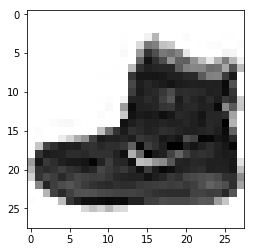

In [10]:
# Меняйте значение n чтобы просмотреть результаты распознавания других изображений
n = 0
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [11]:
print(predictions[n])

[2.83374746e-09 5.74337577e-10 5.81313941e-10 4.26681218e-10
 1.17839169e-10 1.16906995e-04 3.09522683e-08 4.48328588e-04
 1.40474481e-06 9.99433339e-01]


In [12]:
# Определяем номер класса изображения, который предлагает сеть
np.argmax(predictions[n])

9

In [13]:
classes[np.argmax(predictions[n])]

'ботинки'

In [14]:
np.argmax(y_train[n])

9

In [15]:
classes[np.argmax(y_train[n])]

'ботинки'

## Проверка на тестовых данных

In [42]:
# Преобразование размерности изображений
x_test = x_test.reshape(10000, 784)
# Нормализация данных
x_test = x_test / 255
# Преобразуем метки правильных ответов в категории
y_test = utils.to_categorical(y_test, 10)
# Запускаем распознавание набора тестовых данных
predictions = model.predict(x_test)

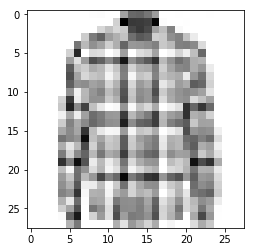

In [43]:
# Меняйте значение n чтобы просмотреть результаты распознавания других изображений
n = 7
plt.imshow(x_test[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [44]:
print(predictions[n])

[0.08351354 0.02605741 0.07738172 0.09197231 0.01924272 0.44308648
 0.10164612 0.10202488 0.03765085 0.01742394]


In [38]:
# Определяем номер класса изображения, который предлагает сеть
np.argmax(predictions[n])

6

In [39]:
classes[np.argmax(predictions[n])]

'рубашка'

In [40]:
np.argmax(y_test[n])

0

In [41]:
classes[np.argmax(y_test[n])]

'футболка'